# Practical Statistics for Data Scientists
## Exploratory Data Analysis

This Notebook is the python equivalent of the R code for Chapter-1, from the book <a href="http://shop.oreilly.com/product/0636920048992.do">Practical Statistics for Data Scientists</a> by Peter Bruce and Andrew Bruce. This <a href="https://github.com/andrewgbruce/statistics-for-data-scientists">GitHub</a> repository has the complete R code for the book.

The authors note that the aim of the book is to be a "Desk Reference" for key Statistical concepts that are relevant to Data Science, explaining their importance and the reason behind that choice.

Data that is used in the book, has been curated by the authors and made available on <a href="https://drive.google.com/drive/folders/0B98qpkK5EJemYnJ1ajA1ZVJwMzg">Google Drive</a> and <a href="https://www.dropbox.com/sh/clb5aiswr7ar0ci/AABBNwTcTNey2ipoSw_kH5gra?dl=0">Dropbox</a>


In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from scipy.stats import trim_mean

In [70]:
# Read the data from a .csv file
stateDataDF = pd.read_csv("../data/state.csv")

In [71]:
# Check the type of data structure, holding the data
type(stateDataDF)

pandas.core.frame.DataFrame

In [72]:
# Top 10 rows/records of the data
stateDataDF.head(10)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


In [73]:
# Bottom 10 rows/records of the data
stateDataDF.tail(10)

,State,Population,Murder.Rate,Abbreviation
40,South Dakota,814180,2.3,SD
41,Tennessee,6346105,5.7,TN
42,Texas,25145561,4.4,TX
43,Utah,2763885,2.3,UT
44,Vermont,625741,1.6,VT
45,Virginia,8001024,4.1,VA
46,Washington,6724540,2.5,WA
47,West Virginia,1852994,4.0,WV
48,Wisconsin,5686986,2.9,WI
49,Wyoming,563626,2.7,WY


In [74]:
# Adding a new column with derived data 
stateDataDF['PopulationInMillions'] = stateDataDF['Population']/1000000

In [75]:
# Get the data types of feature/attributes in the data
stateDataDF.dtypes

State                    object
Population                int64
Murder.Rate             float64
Abbreviation             object
PopulationInMillions    float64
dtype: object

In [76]:
# Checking the data, ensure column is added
stateDataDF.head(10)

,State,Population,Murder.Rate,Abbreviation,PopulationInMillions
0,Alabama,4779736,5.7,AL,4.779736
1,Alaska,710231,5.6,AK,0.710231
2,Arizona,6392017,4.7,AZ,6.392017
3,Arkansas,2915918,5.6,AR,2.915918
4,California,37253956,4.4,CA,37.253956
5,Colorado,5029196,2.8,CO,5.029196
6,Connecticut,3574097,2.4,CT,3.574097
7,Delaware,897934,5.8,DE,0.897934
8,Florida,18801310,5.8,FL,18.801310
9,Georgia,9687653,5.7,GA,9.687653


In [77]:
# Get the summary of numerical data type
# columns in the data
stateDataDF.describe()

,Population,Murder.Rate,PopulationInMillions
count,5.000000e+01,50.000000,50.000000
mean,6.162876e+06,4.066000,6.162876
std,6.848235e+06,1.915736,6.848235
min,5.636260e+05,0.900000,0.563626
25%,1.833004e+06,2.425000,1.833004
50%,4.436370e+06,4.000000,4.436369
75%,6.680312e+06,5.550000,6.680312
max,3.725396e+07,10.300000,37.253956


In [78]:
# Rename column heading
stateDataDF.rename(columns={'Murder.Rate': 'MurderRate'}, inplace=True)

In [79]:
# Get the column headings
list(stateDataDF)

['State', 'Population', 'MurderRate', 'Abbreviation', 'PopulationInMillions']

<br>

### Percentile

In [80]:
# Explore percentiles of Murder Rate,
# 5%, 10%, 25%, 50%, 75% and 95%
murderRatePercentile = stateDataDF.MurderRate.quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.95])

In [81]:
print(murderRatePercentile)

0.05    1.600
0.10    1.890
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: MurderRate, dtype: float64


<br>

### BoxPlot

In [82]:
# BoxPlot Population In Millions
fig, ax1 = plt.subplots()
fig.set_size_inches(9,  15)

ax1 = sns.boxplot(x=stateDataDF.PopulationInMillions, orient="v")
ax1.set_ylabel("Population by State in Millions", fontsize=15)
ax1.set_title("Population - BoxPlot", fontsize=20)

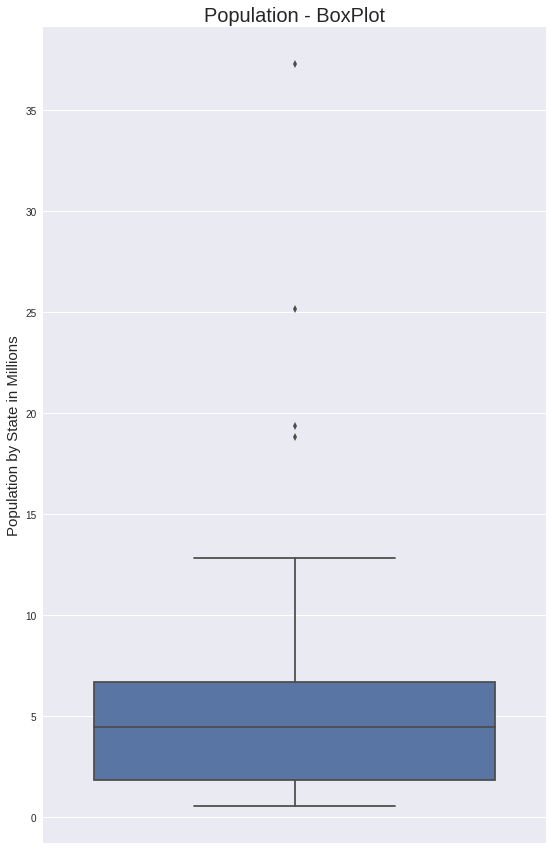

In [83]:
sns.plt.show()

<br>

### Histogram

In [84]:
# Histogram Population In Millions
fig, ax2 = plt.subplots()
fig.set_size_inches(9,  15)

ax2 = sns.distplot(stateDataDF.PopulationInMillions, kde=False)
ax2.set_ylabel("Frequency", fontsize=15)
ax2.set_xlabel("Population by State in Millions", fontsize=15)
ax2.set_title("Population - Histogram", fontsize=20)

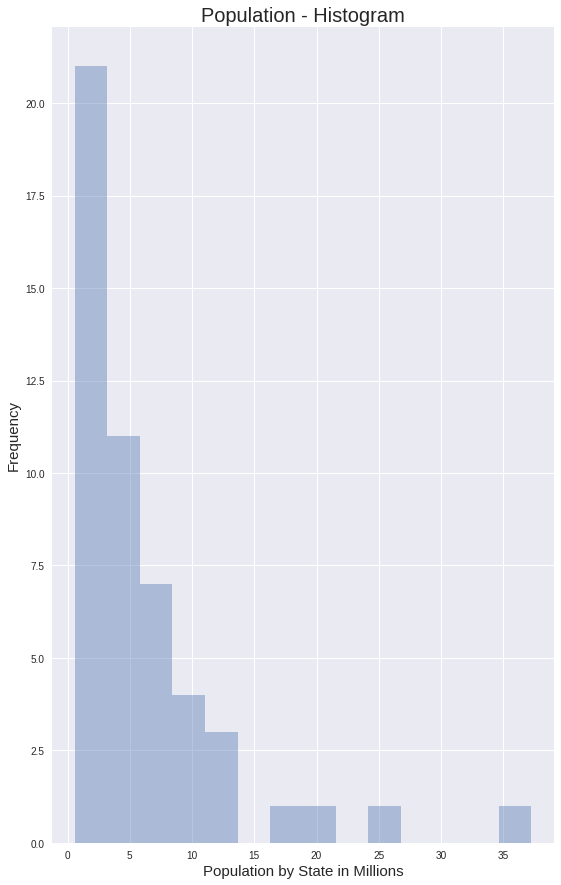

In [85]:
sns.plt.show()

<br>

### Frequency Table

Python has a few ways to illustrate a Frequency Table, I have chosen crosstab and groupby. To accomplish this, I added another column to the dataframe that specified bins, to enable me to perform the groupby and crosstab functionality.

In [86]:
# Perform the binning action, the bins have been
# chosen to accentuate the output for the Frequency Table
stateDataDF['PopulationInMillionsBins'] = pd.cut(stateDataDF.PopulationInMillions, bins=[0, 1, 2, 5, 8, 12, 15, 20, 50])

In [87]:
stateDataDF

,State,Population,MurderRate,Abbreviation,PopulationInMillions,PopulationInMillionsBins
0,Alabama,4779736,5.7,AL,4.779736,"(2, 5]"
1,Alaska,710231,5.6,AK,0.710231,"(0, 1]"
2,Arizona,6392017,4.7,AZ,6.392017,"(5, 8]"
3,Arkansas,2915918,5.6,AR,2.915918,"(2, 5]"
4,California,37253956,4.4,CA,37.253956,"(20, 50]"
5,Colorado,5029196,2.8,CO,5.029196,"(5, 8]"
6,Connecticut,3574097,2.4,CT,3.574097,"(2, 5]"
7,Delaware,897934,5.8,DE,0.897934,"(0, 1]"
8,Florida,18801310,5.8,FL,18.801310,"(15, 20]"
9,Georgia,9687653,5.7,GA,9.687653,"(8, 12]"


In [88]:
# One type of Frequency Table
pd.crosstab(stateDataDF.PopulationInMillionsBins, stateDataDF.Abbreviation, margins=True)

Abbreviation,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,All
PopulationInMillionsBins,,,,,,,,,,,,,,,,,,,,,
"(0, 1]",1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,7
"(1, 2]",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,7
"(2, 5]",0,1,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,14
"(5, 8]",0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,10
"(8, 12]",0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,6
"(12, 15]",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
"(15, 20]",0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
"(20, 50]",0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
All,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50


In [89]:
stateDataDF.groupby(stateDataDF.PopulationInMillionsBins)['Abbreviation'].apply(','.join)

PopulationInMillionsBins
(0, 1]                           AK,DE,MT,ND,SD,VT,WY
(1, 2]                           HI,ID,ME,NE,NH,RI,WV
(2, 5]      AL,AR,CT,IA,KS,KY,LA,MS,NV,NM,OK,OR,SC,UT
(5, 8]                  AZ,CO,IN,MD,MA,MN,MO,TN,WA,WI
(8, 12]                             GA,MI,NJ,NC,OH,VA
(12, 15]                                        IL,PA
(15, 20]                                        FL,NY
(20, 50]                                        CA,TX
Name: Abbreviation, dtype: object

<br>

### Density Plot

In [92]:
# Density Plot - Murder Rate
fig, ax3 = plt.subplots()
fig.set_size_inches(7,  9)

ax3 = sns.distplot(stateDataDF.MurderRate, kde=True)
ax3.set_ylabel("Density", fontsize=15)
ax3.set_xlabel("Murder Rate per Million", fontsize=15)
ax3.set_title("Desnsity Plot - Murder Rate", fontsize=20)


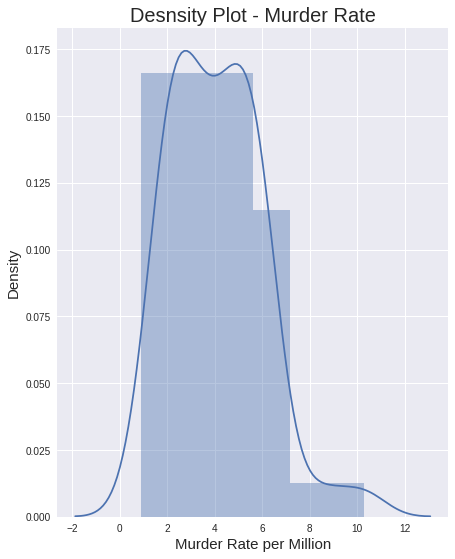

In [93]:
sns.plt.show()